In [1]:
import numpy as np #导库
from sklearn import tree
from sklearn.datasets import load_wine   #自带伦敦红酒数据集
from sklearn.model_selection import train_test_split

In [2]:
wine=load_wine()
print(wine.data)   #数据集
print(wine.target)   #数据标签
print(wine.data.shape)  #一个178x13的数据结构
print(wine.feature_names)  #特征名字(中文见下)
print(['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','稀释葡萄酒','脯氨酸'])
print(wine.target_names)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['酒精', '苹果

In [3]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)   #利用Pandas打印数据

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
Xtrain,Xtest,Ytrain,Ytest= train_test_split(wine.data,wine.target,test_size=0.3)
#将数据和标签分成训练集与测试集，测试集尺寸为0.3（30%）

In [5]:
print(Xtrain.shape)    #分完数据结构
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(124, 13)
(54, 13)
(124,)
(54,)


In [6]:
'''实例化'''
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=99  #random_state可以设置生成树的随机种子,以确保分数确定且更高
                                  ,splitter="random" #默认beat将选择更重要的进行分支，ramdom则让树更加随机
                                 )
'''带入训练'''
clf=clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)   #用测试集给模型打分给模型打分（返回预测的准确度）
score

0.8703703703703703

In [16]:
f_names=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','稀释葡萄酒','脯氨酸']
import graphviz  #导入画树需要的库
dot_data = tree.export_graphviz(clf
                                ,feature_names=f_names
                                ,class_names=["琴酒","雪莉","贝尔魔得"]
                                ,filled=True   #是否填充颜色
                                ,rounded=True  #圆形轮廓
                                ,out_file=None
                               )
graph = graphviz.Source(dot_data)   #当不纯度entropy = 0，就能分出结果
graph.view()   #编码错误。。。。。。。但不影响

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 13: invalid start byte

In [8]:
[*zip(f_names,clf.feature_importances_)]
#决策树不一定会运用所有的特征，有使用的特征它会有个重要性，0为不使用,根节点的重要性往往最高

[('酒精', 0.0),
 ('苹果酸', 0.05135547516260039),
 ('灰', 0.057230368901581785),
 ('灰的碱性', 0.05177061149994456),
 ('镁', 0.039826155973963565),
 ('总酚', 0.035003771859942336),
 ('类黄酮', 0.10182983405275524),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.02098317152699719),
 ('颜色强度', 0.20257133565347826),
 ('色调', 0.0),
 ('稀释葡萄酒', 0.08061919118907374),
 ('脯氨酸', 0.3588100841796631)]

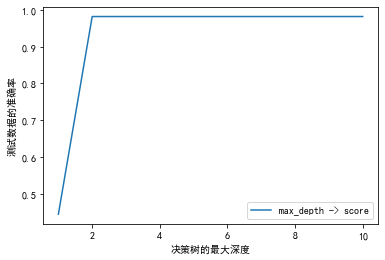

In [9]:
'''再训练一个演示决策树最大深度的作用'''
import matplotlib.pyplot as plt
test=[]
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1  #控制树的最大深度（1-10）
                                      ,criterion="entropy"
                                      ,random_state=0  #random_state可以设置生成树的随机种子,以确保分数确定且更高
                                     # ,splitter="random" #默认beat将选择更重要的进行分支，ramdom则让树更加随机
                                     )
    '''带入训练'''
    clf=clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)   #用测试集给模型打分给模型打分（返回预测的准确度）
    test.append(score)
plt.rcParams['font.sans-serif'] = ['SimHei']  #更改一个有中文的字体
plt.rcParams['axes.unicode_minus']=False  #解决符号不显示问题
plt.xlabel("决策树的最大深度")
plt.ylabel("测试数据的准确率")
plt.plot(range(1,11),test,label="max_depth -> score")
plt.legend()
plt.show()   #显示各深度的准确率（分数），选取分数最高的深度最低的

In [10]:
'''决策树默认会向多数类的标签更多的权重，但这可能不是我们所需要的，例如银行颁发信用卡
会违约的人与不会违约的人可能是1：99，决策树可能自动对该标签给予较小的权重
但银行在发卡时却很注重是否会违约，所以我们应该手动调整对该标签的权重'''

'决策树默认会向多数类的标签更多的权重，但这可能不是我们所需要的，例如银行颁发信用卡\n会违约的人与不会违约的人可能是1：99，决策树可能自动对该标签给予较小的权重\n但银行在发卡时却很注重是否会违约，所以我们应该手动调整对该标签的权重'

In [11]:
'''重要接口'''
print(clf.apply(Xtest))  #返回每个测试节点所在的叶子节点索引  (这两个只需要传入特征)
print(clf.predict(Xtest))   #返回每个测试样本的分类/回归结果

[12  2  2 12 12  6  3  3 12  6  6  3  6  6  8  3  6  6  6 12  8  3 12  6
 12 12  6  6 12 12  8  6  8  2 12  2 12 12 12  2 12 12  3  3  6  6 12  6
  6  6  6  2  2  6]
[0 1 1 0 0 1 2 2 0 1 1 2 1 1 1 2 1 1 1 0 1 2 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0
 0 0 1 0 0 2 2 1 1 0 1 1 1 1 1 1 1]


In [12]:
'''测试集分类结果的整理与打印'''
L=[]
class_names=["琴酒","雪莉","贝尔魔德"]
for i in range(len(clf.predict(Xtest))):
    L.append(class_names[clf.predict(Xtest)[i]])
pd.concat([pd.DataFrame(Xtest),pd.DataFrame(L)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.250,3.40,915.0,琴酒
1,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.250,1.67,680.0,雪莉
2,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.020,1.93,750.0,雪莉
3,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.020,2.77,1285.0,琴酒
4,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.070,2.75,1060.0,琴酒
5,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.150,3.30,290.0,雪莉
6,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.590,1.56,835.0,贝尔魔德
7,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.600,1.68,830.0,贝尔魔德
8,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.010,3.26,1190.0,琴酒
9,11.64,2.06,2.46,21.6,84.0,1.95,1.69,0.48,1.35,2.80,1.000,2.75,680.0,雪莉
